# Code for statistical analysis


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#read 
df = pd.read_csv('final_filtered_results_75px.csv')
df.columns

Index(['Key', 'ESV_pred', 'EDV_pred', 'EF_pred', 'ESV_pixel', 'EDV_pixel',
       'EF_pixel', 'ESV_gt_x', 'EDV_gt_x', 'EF_gt_x', 'ESV_gt_y', 'EDV_gt_y',
       'EF_gt_y'],
      dtype='object')

## Calc and visualise R2 for ESV prediction

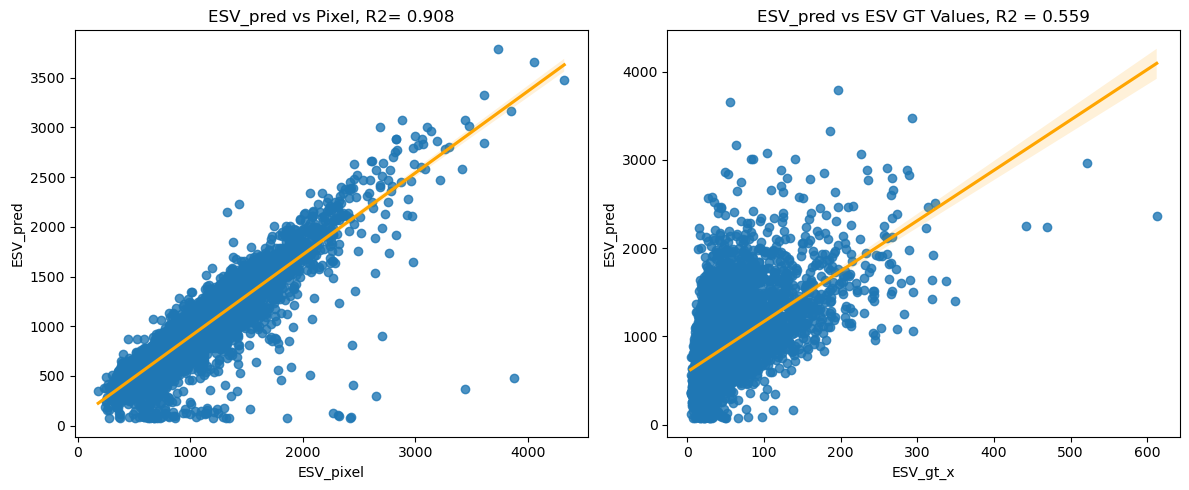

In [3]:
#check linear relationship between ESV pred vs ESV (pixel / gt)
x1 = df['ESV_pixel']
y1 = df['ESV_pred']

x2 = df['ESV_gt_x']
y2 = df['ESV_pred']

#calculate pearson R coeff
esv_predpix_corr = np.corrcoef(x1,y1)[0,1]
esv_predgt_corr = np.corrcoef(x2, y2)[0,1]

#first: esv predictions vs segmentation pixel vals
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
# Use seaborn regplot for scatter + regression line
sns.regplot(x=x1, y=y1, data=df, ax=ax[0], line_kws={'color':'orange'})
ax[0].set_title(f"ESV_pred vs Pixel, R2= {esv_predpix_corr:.3f}")
sns.regplot(x=x2, y=y2, data=df, ax=ax[1], line_kws={'color':'orange'})
ax[1].set_title(f"ESV_pred vs ESV GT Values, R2 = {esv_predgt_corr:.3f}")

plt.tight_layout()
plt.show()


## Calc and vis EDV preds vs GT+pix

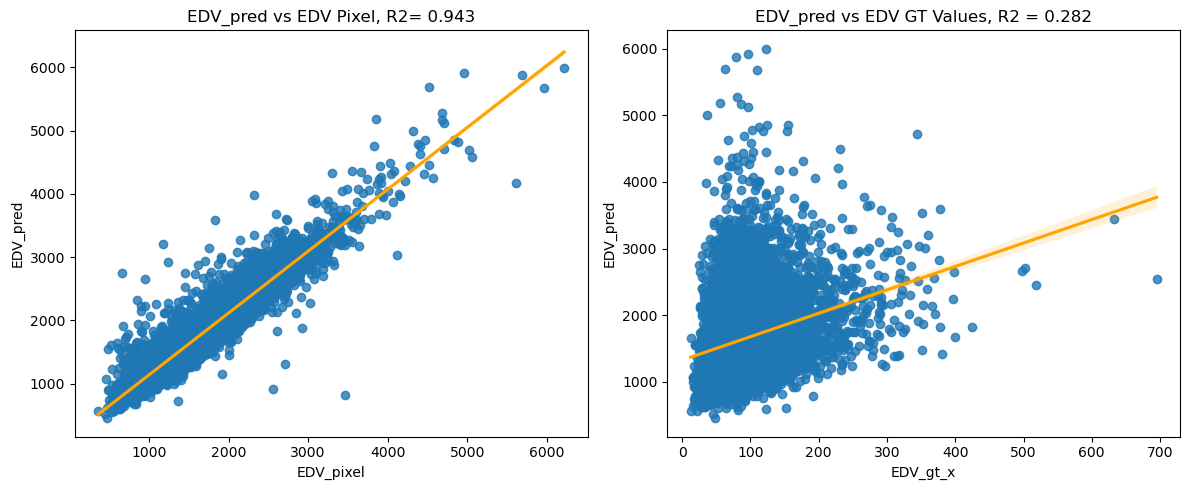

In [4]:
#check linear relationship between EDV pred vs ESV (pixel / gt)
x1 = df['EDV_pixel']
y1 = df['EDV_pred']

x2 = df['EDV_gt_x']
y2 = df['EDV_pred']

#calculate pearson R coeff
edv_predpix_corr = np.corrcoef(x1,y1)[0,1]
edv_predgt_corr = np.corrcoef(x2, y2)[0,1]

#first: esv predictions vs segmentation pixel vals
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
# Use seaborn regplot for scatter + regression line
sns.regplot(x=x1, y=y1, data=df, ax=ax[0], line_kws={'color':'orange'})
ax[0].set_title(f"EDV_pred vs EDV Pixel, R2= {edv_predpix_corr:.3f}")
sns.regplot(x=x2, y=y2, data=df, ax=ax[1], line_kws={'color':'orange'})
ax[1].set_title(f"EDV_pred vs EDV GT Values, R2 = {edv_predgt_corr:.3f}")

plt.tight_layout()
plt.show()

## Calc and vis EF pred vs EF(pix/gt)

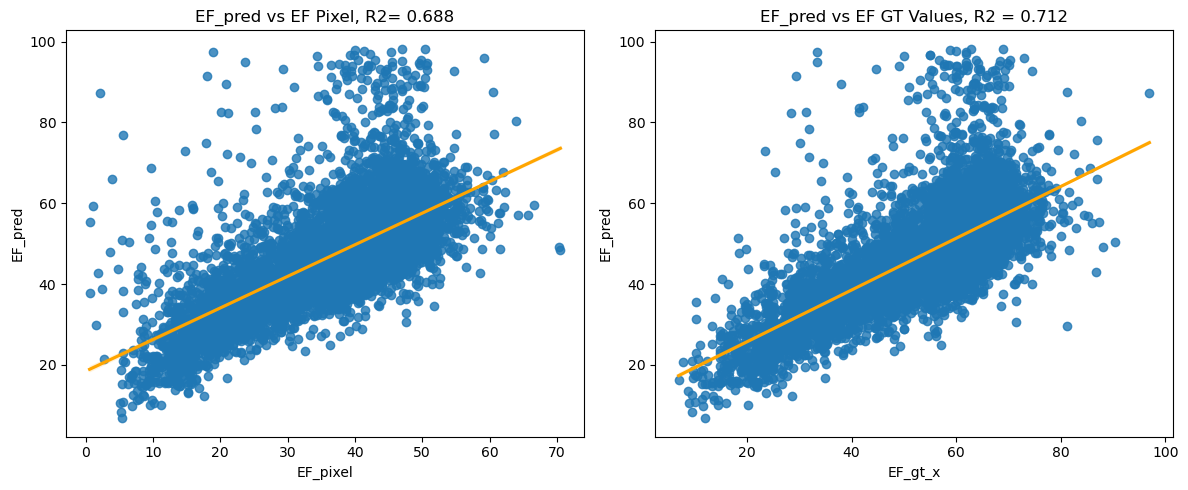

In [5]:
#check linear relationship between ESV pred vs ESV (pixel / gt)
x1 = df['EF_pixel']
y1 = df['EF_pred']

x2 = df['EF_gt_x']
y2 = df['EF_pred']

#calculate pearson R coeff
ef_predpix_corr = np.corrcoef(x1,y1)[0,1]
ef_predgt_corr = np.corrcoef(x2, y2)[0,1]

#first: esv predictions vs segmentation pixel vals
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
# Use seaborn regplot for scatter + regression line
sns.regplot(x=x1, y=y1, data=df, ax=ax[0], line_kws={'color':'orange'})
ax[0].set_title(f"EF_pred vs EF Pixel, R2= {ef_predpix_corr:.3f}")
sns.regplot(x=x2, y=y2, data=df, ax=ax[1], line_kws={'color':'orange'})
ax[1].set_title(f"EF_pred vs EF GT Values, R2 = {ef_predgt_corr:.3f}")

plt.tight_layout()
plt.show()

## Visualise using BlandAltman

Text(0.5, 1.0, 'BA Plot: EF(pred) VS EF(gt)')

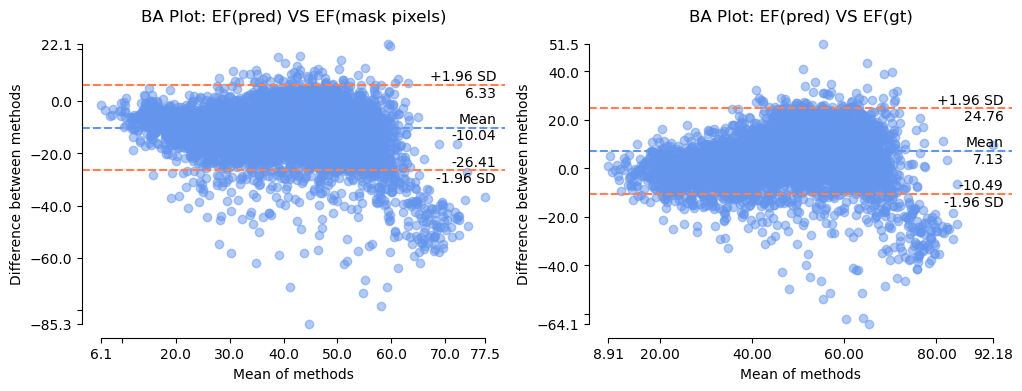

In [6]:
from pyCompare import blandAltman
#define the data to be used
ef_gt = df['EF_gt_x']
ef_pred= df['EF_pred']
ef_pix = df['EF_pixel']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

blandAltman(ef_pix, ef_pred,
            limitOfAgreement=1.96,
            confidenceInterval=95, ax=ax[0])
ax[0].set_title('BA Plot: EF(pred) VS EF(mask pixels)')

blandAltman(ef_gt, ef_pred,
            limitOfAgreement=1.96,
            confidenceInterval=95, ax=ax[1])
ax[1].set_title('BA Plot: EF(pred) VS EF(gt)')
